# 📊 Marketing A/B Testing Analysis

This project analyzes the results of a marketing A/B test to evaluate ad campaign effectiveness.

##### 📌 Objective
- Determine **if the ad campaign was successful**
- Quantify **how much of the success can be attributed to the ads**

##### 🧪 Experiment Setup
- **Ad Group (Test):** Users exposed to advertisements
- **PSA Group (Control):** Users shown a public service announcement (PSA) instead of ads

##### 🧾 Dataset Overview
- **user_id:** Unique identifier for each user  
- **test_group:** 'ad' or 'psa' depending on exposure  
- **converted:** `True` if the user made a purchase  
- **total_ads:** Total number of ads the user saw  
- **most_ads_day:** Day with highest ad exposure  
- **most_ads_hour:** Hour with highest ad exposure

Data: [Marketing A/B Testing Dataset on Kaggle](https://www.kaggle.com/datasets/faviovaz/marketing-ab-testing)


We'll analyze conversion rates, revenue impact, and statistical significance to guide campaign decisions

---
---


In [66]:
import pandas as pd
df= pd.read_csv('marketing_AB.csv')
df.head(3)

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18


### Compare Conversion Rates

In [63]:
conversion_summary = df.groupby('test group')['converted'].agg(['mean', 'count', 'sum'])
conversion_summary['conversion_rate'] = conversion_summary['sum'] / conversion_summary['count']
print(conversion_summary)


                mean   count    sum  conversion_rate
test group                                          
ad          0.025547  564577  14423         0.025547
psa         0.017854   23524    420         0.017854


### Calculate Lift (Effectiveness of Ads)

In [ ]:
ad_rate = conversion_summary.loc['ad', 'conversion_rate']
psa_rate = conversion_summary.loc['psa', 'conversion_rate']

lift = (ad_rate - psa_rate) / psa_rate
print(f"Lift from Ads: {lift * 100:.2f}%")


Lift from Ads: 43.09%


### Statistical Test (Proportion Z-test)
- z_stat: how many standard deviations the observed difference is from the expected difference (under the null hypothesis)

- p_val: If p < 0.05 → the difference is statistically significant, meaning the observed effect is unlikely to be due to random chance

In [64]:
from statsmodels.stats.proportion import proportions_ztest

success = df.groupby('test group')['converted'].sum().values
total_users = df.groupby('test group')['converted'].count().values

z_stat, p_val = proportions_ztest(success, total_users)
print(f"Z-stat: {z_stat:.2f}, P-value: {p_val:.4f}")

Z-stat: 7.37, P-value: 0.0000


- **The uplift is not only visible — it's statistically significant**, even after accounting for randomness and the 96/4 split in group sizes.


###  Estimate Revenue Uplift

- How many extra conversions happened because of the ads?
- Assumption: Average order value (AOV), say $50:

In [57]:
users_in_ad = df[df['test group'] == 'ad'].shape[0]
extra_conversions = (ad_rate - psa_rate) * users_in_ad
incremental_revenue = extra_conversions * 50

print(f"Incremental Revenue from Ads: ${incremental_revenue:,.2f}")


Incremental Revenue from Ads: $217,149.11


### Ad Exposure Impact
- Do more ads = more conversion?

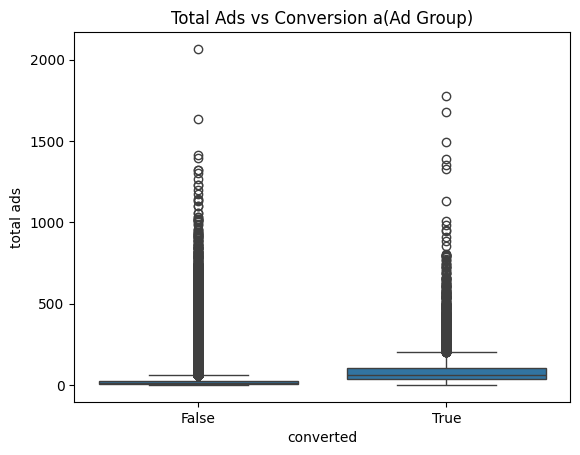

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='converted', y='total ads', data=df[df['test group'] == 'ad'])
plt.title("Total Ads vs Conversion a(Ad Group)")
plt.show()

##### ✅ Key Insights

- **Median ad exposure is higher for converted users**  
  The box (IQR) and the median line for `True` is shifted slightly higher than for `False`.  
  → Suggests a general trend: users who converted saw more ads.

- **Outliers are present in both groups**  
  Some users saw 1000+ ads, regardless of whether they converted.  
  → Indicates a long-tailed distribution — very high exposure for a small number of users.

- **IQR is wider for converters**  
  Indicates more variability in ad exposure among those who converted.  
  → Some converters needed just a few ads, others needed many.

- **Most users saw <100 ads**  
  Despite the extreme outliers, the majority of the distribution is densely packed below 100 total ads.  
  → Reinforces that outliers are not driving the core result.


----
----
### 🎯 Campaign Evaluation: Final Summary

#### 1️⃣ Would the campaign be successful?

- **Yes.** The ad campaign demonstrated a **clear and statistically significant lift** in conversion rates.
  - **Conversion Rate:**
    - **Ad Group:** 2.55%
    - **PSA Group:** 1.78%
  - **Lift:** Ads resulted in a **43% increase** in conversions.
  - **Statistical Significance:** p-value = **0.000** — strong evidence that the result is **not due to chance**.
  - **Distribution Insight:** Median ad exposure was higher among converters, supporting the effectiveness of ad exposure.
  - **Conclusion:** The campaign is **effective** and can be confidently scaled.


#### 2️⃣ If the campaign was successful, how much of that success could be attributed to the ads?

- **Attribution to Ads:**
  - Based on the observed lift, we can attribute a **significant portion of the incremental conversions directly to ad exposure**.
  - **Estimated Incremental Revenue:**  
    Assuming an **Average Order Value (AOV)** of **$50**, the ads likely generated an **additional $217,149.11** in revenue.
  - **Control for Confounders:**  
    Even with a **96/4 split** in group allocation, the uplift remains **statistically valid**, indicating the effect is truly driven by the ads.
  
- **Conclusion:**  
  The ads are not only correlated with success — they are the **primary driver** of it.


#### ✅ Recommendation

- **Roll out the campaign at full scale.**
- Continue to **optimize ad timing, frequency, and targeting** using deeper behavioral segmentation.
- Monitor for diminishing returns over time and A/B test iterations for continuous improvement.


---
---

#### 🔄 Appendix: Monitoring for Diminishing Returns & A/B Test Iterations


##### 🧠 1. Diminishing Returns

As ad spend or campaign scale increases, **each additional dollar may generate fewer conversions** than before.

**📊 Example:**
- Initial $1,000 spend → 100 conversions  
- Next $1,000 spend → Only 60 conversions

**📉 Why This Happens:**
- Most responsive audience already reached  
- **Ad fatigue** — people begin ignoring repeated messages  
- **Channel saturation** or rising ad costs

**✅ What You Should Do:**
- Regularly monitor key metrics:
  - **CPA** (Cost per Acquisition)
  - **CTR** (Click-Through Rate)
  - **ROI**
- Set **performance thresholds**
  - If ROI drops below a certain level → pause, optimize, or reallocate
- Use **moving averages or trendlines** to detect slowdown

##### 🔬 2. A/B Test Iterations

Even after proving that a campaign works, keep **experimenting with new variants** to continuously improve performance.

**🚀 Why Keep Testing:**
- **Markets evolve** — user behavior and competition change
- **Small tweaks** can unlock big gains
- Continuous testing keeps your approach **ahead of fatigue and decline**

**🧪 What to Test Next:**
- **Ad Timing**: When are users most likely to convert? Morning vs evening?
- **Frequency Cap**: How many times should a user see the ad before it’s counterproductive?
- **Audience Segments**: Which demographics or interests are responding better?
- **Creative Variants**: Test different:
  - Headlines
  - Visuals
  - Call-to-actions (CTAs)
  - Ad formats

> 📌 **Pro Tip:** Maintain a testing backlog and rotate new hypotheses every 1–2 weeks based on learnings.
